# Chapter 19: From Hypothesis Testing to Parameter Estimation

## Examples

### Is the Carnival Game Really Fair?

#### Label the hypotheses

* $H_1: P(\rm{prize}) = \frac{1}{2}$
* $H_2: P(\rm{prize}) = \frac{1}{20}$

#### Gather some data

After 100 trials we find the following:
* $\rm{prize} = 24$
* $\neg \rm{prize} = 76$

#### Find the Bayes factor

##### Find the likelihood of the data under each hypothesis


$$P\left( {D|{H_1}} \right) = {\left( {\frac{1}{2}} \right)^{24}} \times {\left( {1 - \frac{1}{2}} \right)^{76}}$$
$$P\left( {D|{H_2}} \right) = {\left( {\frac{1}{{20}}} \right)^{24}} \times {\left( {1 - \frac{1}{{20}}} \right)^{76}}$$

##### Find the ratio

$$BF = \frac{{P\left( {D|{H_1}} \right)}}{{P\left( {D|{H_2}} \right)}} = \frac{{{{\left( {\frac{1}{2}} \right)}^{24}} \times {{\left( {1 - \frac{1}{2}} \right)}^{76}}}}{{{{\left( {\frac{1}{{20}}} \right)}^{24}} \times {{\left( {1 - \frac{1}{{20}}} \right)}^{76}}}} = 652.72$$

The hypothesis that the game is fair explains the observations about 653 times better than the hypothesis that the true rate of wins is only $\frac{1}{20}$.

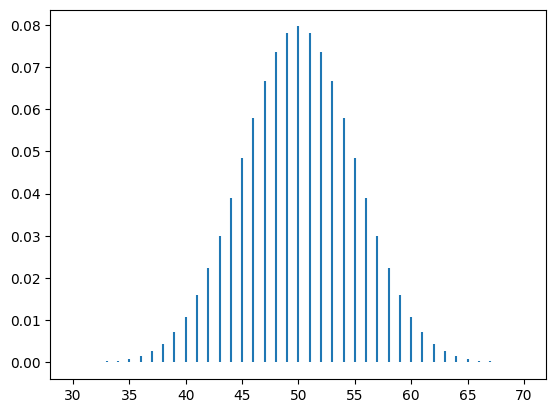

'The probability of seeing 24 or fewer prizes if the probability of winning is (1/2) is: 0.0000090500%'

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

H1_dist = binom(100, (1/2))
x = np.arange(30, 71)
y = H1_dist.pmf(x)

fig, ax = plt.subplots(1,1)
ax.vlines(x,0, y)
plt.show()

display(f"The probability of seeing 24 or fewer prizes if the probability of winning is (1/2) is: {H1_dist.cdf(24):.10%}")


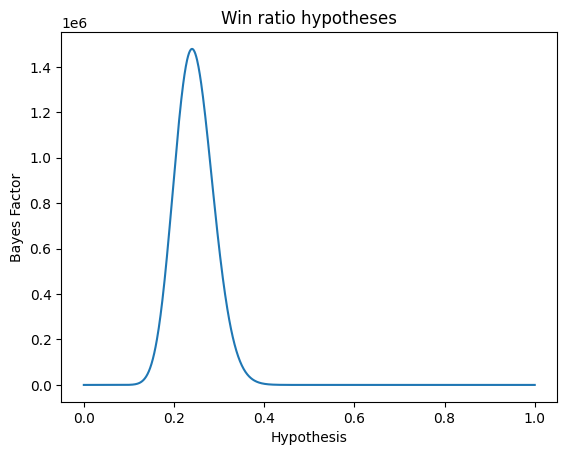

'The highest bayes factor is 1478752.5717556716 for win rate 0.24024024024024024'

In [45]:
def p_func(p: np.array) -> np.array:
    return np.power(p, 24) * np.power((1-p),76)

H1_P = pow((1/2), 24) * pow((1/2), 76)
def df_func(p: np.array) -> np.array:
    return p_func(p)/H1_P


x = np.linspace(0, 1, 1_000)
y = df_func(x)
fig, ax = plt.subplots(1,1)
ax.plot(x, y)
ax.set_title("Win ratio hypotheses")
ax.set_ylabel("Bayes Factor")
ax.set_xlabel("Hypothesis")
plt.show()

display(f"The highest bayes factor is {y.max()} for win rate {x.item(y.argmax())}")

Text(0.5, 0, 'Hypotheses')

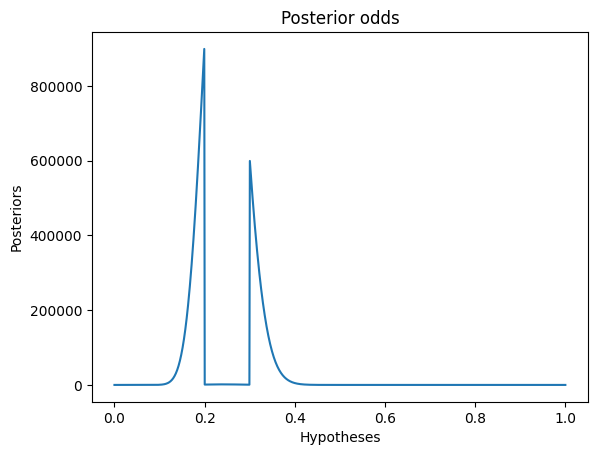

In [58]:
priors = np.ones(x.size)
priors[(x >= 0.2) & (x <= 0.3)] = 1/1000
posteriors = priors*y
fig, ax = plt.subplots(1,1)
ax.plot(x, posteriors)
ax.set_title("Posterior odds")
ax.set_ylabel("Posteriors")
ax.set_xlabel("Hypotheses")

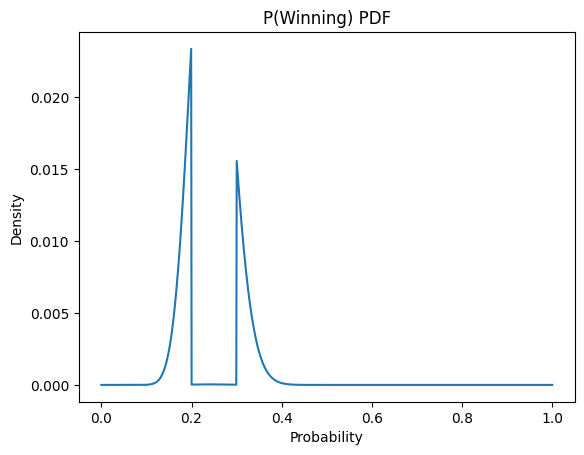

In [63]:
ducks_pdf = posteriors / posteriors.sum()
fig, ax = plt.subplots(1,1)
ax.plot(x, ducks_pdf)
ax.set_title("P(Winning) PDF")
ax.set_xlabel("Probability")
ax.set_ylabel("Density")
plt.show()

In [67]:
p_understimate = ducks_pdf[x<.5].sum()

display(f"The probability that the true rate of winning draws is less than 1/2 is: {p_understimate}")

'The probability that the true rate of winning draws is less than 1/2 is: 0.9999997589906652'

In [74]:
expected_value = (x * ducks_pdf).sum()
most_likely_value = x.item(ducks_pdf.argmax())
display(f"The expected value of the game is: {expected_value}")
display(f"The most likely single value is: {most_likely_value}")

'The expected value of the game is: 0.24054531340391858'

'The most likely single value is: 0.1991991991991992'

#### From the Bayes Factor to Parameter Estimation

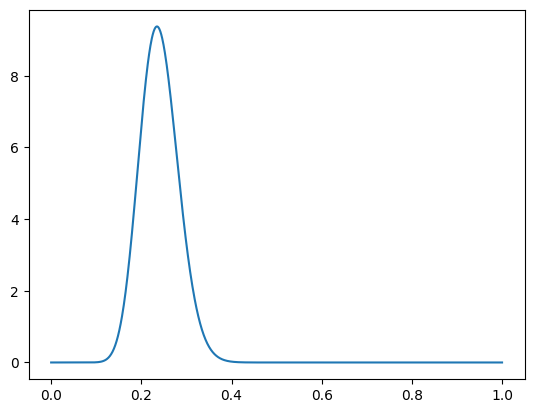

In [81]:
from scipy.stats import beta
ducks_beta = beta(24,76)
fig, ax = plt.subplots(1,1)
ax.plot(x, ducks_beta.pdf(x), label="Beta")
# ax.plot(x, y, '--', label="Bayes")
plt.show()

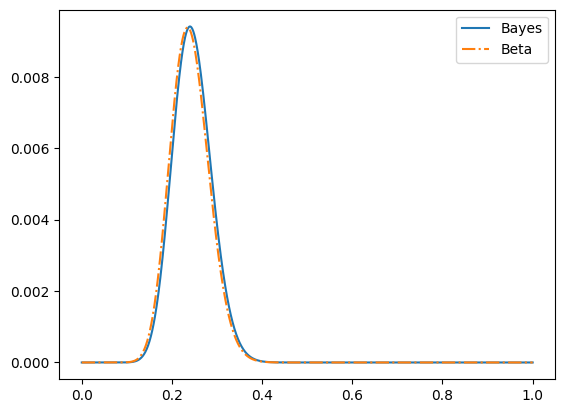

In [132]:
ducks_beta_scaled = ducks_beta.pdf(x)* 1/1000
fig, ax = plt.subplots(1,1)
ax.plot(x, y / y.sum(), '-', label="Bayes")
ax.plot(x, ducks_beta_scaled,"-.", label="Beta")
ax.legend()

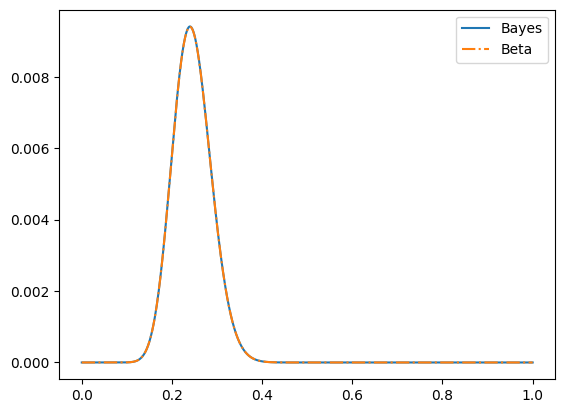

In [133]:
ducks_beta_scaled = beta.pdf(x, 24+1,76+1)* 1/1000
fig, ax = plt.subplots(1,1)
ax.plot(x, y / y.sum(), '-', label="Bayes")
ax.plot(x, ducks_beta_scaled,"-.", label="Beta")
ax.legend()

As the above series of plots shows, it's posible to turn a collection of posterior odds into a probability distribution, and it's possiblble to re-construct a beta distribution from a collection of hypotheses.

### Exercises

1.  Our Bayes factor assumed that we were looking at $H_1: P(\rm{prize}) = 0.5$.  This allowed us to derive a version of the beta distribution with an alpha of 1 and a beta of 1.  Would it matter if we chose a different probability for $H_1$?  Assume $H_1: P(\rm{prize}) = 0.24$ then see if the resulting distribution, once normalized to sum to 1, is any different than the original hypothesis.
2.  Write a prior for the distribution in which each hypothesis is 1.04 times more likely than the previous hypothesis (assume our $dx$ remains the same).
3.  Suppose you observed anotehr duck game that included 34 ducks with prizes and 66 ducks without prizes.  How would you set up a test to answer "What is the probability that you have a better chane of winning a prize in this game than in the game we used in our eample?  Implementing this requires a bit more sophistication than the R used in this book, but see if you can learn this on your own to kick off your adventures in more advanced Bayesian statistics!